In [59]:
#import openbabel
#import pybel
import sys
import os
import os.path
import csv
import pandas as pd
import argparse
import numpy as np
import itertools
import shutil
from itertools import combinations
import re
import collections
from collections import OrderedDict
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.gcf().subplots_adjust(bottom=0.15)

%matplotlib inline

In [144]:
def load_dataset(basedir):

    df_gas_C= pd.read_csv(f'{basedir}/Gas_dataset_coformational_energy.csv')
    df_wat_C = pd.read_csv(f'{basedir}/Water_dataset_coformational_energy.csv')
    df_gas_S = pd.read_csv(f'{basedir}/Gas_dataset_strain_energy.csv')
    df_wat_S = pd.read_csv(f'{basedir}/Water_dataset_strain_energy.csv')


    return [df_gas_S,df_wat_S, df_gas_C,df_wat_C]

Gas Delta_strain_energy 27.839602277614674
Water Delta_strain_energy 20.44109416538179
Gas Delta_conformational_energy(kJ/mol) 30.919735039368632
Water Delta_conformational_energy(kJ/mol) 22.71852619513941


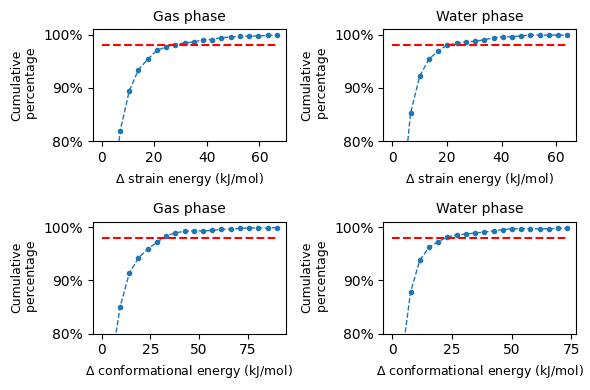

In [145]:
phases = ['Gas', 'Water','Gas', 'Water']

dfs = load_dataset('/Users/geemi/Downloads/rugosity_data/conf_energies')

fig,axs = plt.subplots(2,2, figsize=(6,4))
ax = axs.ravel()
for i in range(4):
    if i <= 1: energy_label = 'Delta_strain_energy'
    else: energy_label = 'Delta_conformational_energy(kJ/mol)'

    energy = np.array(dfs[i][energy_label])
    ## Drop values which are outliers
    energy = energy[energy<150]
    n_s, bins_s = np.histogram(energy,1000)
    x_s = [(bins_s[j]+bins_s[j+1])/2 for j in range(len(bins_s)-1)]
    y_s = np.cumsum(n_s)/np.sum(n_s)
    thresh_s = max(x_s*(y_s*100<98.1))
    print(phases[i],energy_label, thresh_s)
    ## plot
    ax[i].plot(x_s[0:1000:50],y_s[0:1000:50]*100,'--o',linewidth=1,markersize=3)
    ax[i].hlines(98.00,0,max(x_s[0:1000:50]),colors='red',linestyles='dashed')
    ax[i].set_title(f'{phases[i]} phase',fontsize=10)
    ax[i].set_ylabel('Cumulative\n percentage',fontsize=9)
    if i <= 1: ax[i].set_xlabel(r'$\Delta$ strain energy (kJ/mol)',fontsize=9)
    else: ax[i].set_xlabel(r'$\Delta$ conformational energy (kJ/mol)',fontsize=9)
    ax[i].yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
    ax[i].set_ylim(80,101)
    ax[i].set_yticks(np.arange(80, 110, 10))
    
fig.tight_layout()
fig.savefig(f'energy_data_distributions.png', dpi=300, facecolor='w')
fig.show()
